# 다중 분류 (Human Activities)

- PCA 적용(하면 스케일링 안해도 됨)
- SVC, DT, RANDOMFOREST
- 학습 데이터: train.csv
- 테스트: test.csv

##0.임포트

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1.데이터불러오기

In [48]:
train_df = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Dataset/HumanActivityRecognition/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Dataset/HumanActivityRecognition/test.csv')

###확인하기

In [49]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [50]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157
"angle(Z,gravityMean)",7352.0,-0.056515,0.279122,-1.000000,-0.143414,0.003181,0.107659,1.000000


##2.X,y 나누기

In [114]:
X_train, y_train = train_df.drop('Activity', axis=1), train_df['Activity']
X_test, y_test = test_df.drop('Activity', axis=1), test_df['Activity']

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 562), (2947, 562), (7352,), (2947,))

In [116]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [117]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [118]:
y_test

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [119]:
X_train

array([[ 2.8858451e-01, -2.0294171e-02, -1.3290514e-01, ...,
         1.7994061e-01, -5.8626924e-02,  1.0000000e+00],
       [ 2.7841883e-01, -1.6410568e-02, -1.2352019e-01, ...,
         1.8028889e-01, -5.4316717e-02,  1.0000000e+00],
       [ 2.7965306e-01, -1.9467156e-02, -1.1346169e-01, ...,
         1.8063731e-01, -4.9117815e-02,  1.0000000e+00],
       ...,
       [ 2.7338737e-01, -1.7010616e-02, -4.5021828e-02, ...,
         2.4914484e-01,  4.0811188e-02,  3.0000000e+01],
       [ 2.8965416e-01, -1.8843044e-02, -1.5828059e-01, ...,
         2.4643223e-01,  2.5339478e-02,  3.0000000e+01],
       [ 3.5150347e-01, -1.2423118e-02, -2.0386717e-01, ...,
         2.4680852e-01,  3.6694843e-02,  3.0000000e+01]])

##3.PCA

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=42)
X_train_p = pca.fit_transform(X_train)

In [121]:
X_train_p

array([[-1.57272239e+01, -7.24625881e+00,  4.65589364e-01, ...,
         1.98683695e-02,  6.90140957e-01,  8.93005736e-01],
       [-1.57233170e+01, -7.26069038e+00,  2.59002156e-01, ...,
        -1.56160049e-02,  6.09773976e-01, -8.10175585e-02],
       [-1.57425696e+01, -7.20400561e+00, -1.06483367e-01, ...,
         3.62748994e-01, -3.26523632e-02,  1.35644178e-01],
       ...,
       [ 1.19405673e+01,  7.18589795e+00,  2.93842939e+00, ...,
         2.34856689e-02, -2.22867565e-02, -3.11012573e-01],
       [ 1.19906068e+01,  6.75288146e+00,  3.28364137e+00, ...,
         4.52596857e-01, -3.49847730e-02, -6.55146928e-01],
       [ 1.19642885e+01,  6.82458383e+00,  2.65513553e+00, ...,
         2.95310498e-01, -2.57757096e-01, -1.80781040e-01]])

In [122]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29'], dtype=object)

###라벨링

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_test_e = le.transform(y_test)

In [141]:
y_train_e

array([2, 2, 2, ..., 5, 5, 5])

###테스트 PCA

In [125]:
# test에는 fit이 들어가면 안됨
X_test_p = pca.transform(X_test)

##4.랜덤포레스트

In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
# le.fit()
# fit은 학습을 시키는거고 transform은 변환을 시키는 것임
# le.transform()
clf.fit(X_train_p, y_train_e)

RandomForestClassifier(random_state=42)

###테스트

In [143]:
y_pred = clf.predict(X_test_p)
y_pred

array([2, 2, 2, ..., 3, 5, 3])

In [144]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.8982015609093994
recall: 0.8945
precision: 0.9005
f1: 0.8958


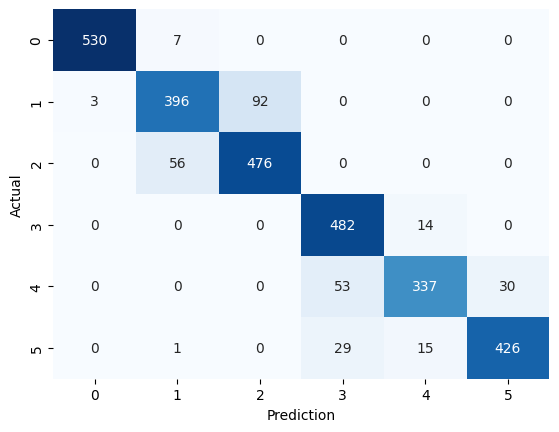

In [145]:
print_metrics(y_test_e, y_pred)

##6.SVC


In [134]:
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train_p, y_train_e)

SVC(random_state=42)

In [135]:
y_pred = clf.predict(X_test_p)
y_pred

array([2, 2, 2, ..., 5, 5, 5])

acc: 0.8880217170003394
recall: 0.8824
precision: 0.8947
f1: 0.8844


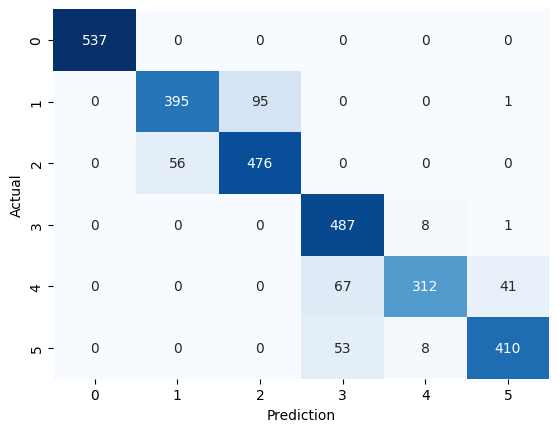

In [136]:
print_metrics(y_test_e, y_pred)

##7.DT

In [137]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_p, y_train_e)

DecisionTreeClassifier(random_state=42)

In [138]:
y_pred = clf.predict(X_test_p)
y_pred

array([1, 2, 2, ..., 3, 4, 4])

acc: 0.8052256532066508
recall: 0.8015
precision: 0.8048
f1: 0.8023


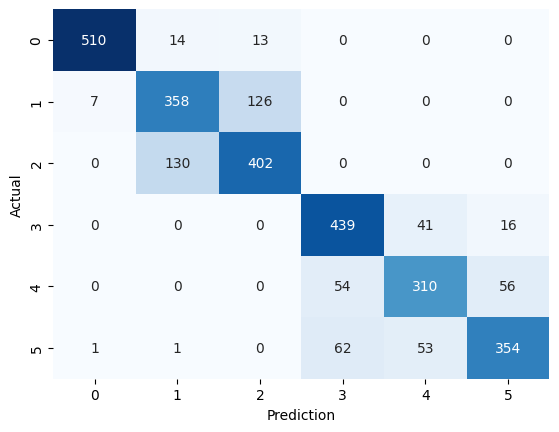

In [139]:
print_metrics(y_test_e, y_pred)